In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [19]:
# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 200
num_rooms = np.random.randint(3, 10, num_samples)
house_age = np.random.randint(1, 100, num_samples)
noise = np.random.normal(0, 50, num_samples)

# Assume a linear relation with price = 50 * rooms + 0.5 * age + noise
price = 50 * num_rooms + 0.5 * house_age + noise

# Create a DataFrame
data = pd.DataFrame({'num_rooms': num_rooms, 'house_age': house_age, 'price': price})

In [20]:
# Splitting the data into training and testing sets
X = data[['num_rooms', 'house_age']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initialize and train the model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
model_xgb.fit(X_train, y_train)

# Predictions
predictions = model_xgb.predict(X_test)

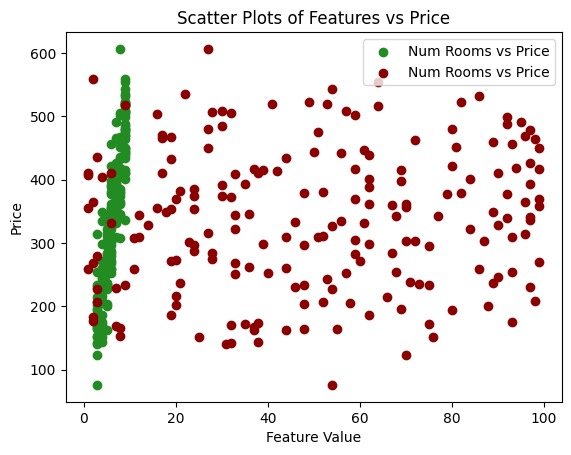

In [21]:
output_folder = r"E:\Machine Learning\Models\XGBooster Regressor\output" # use your own here

#Plot
plt.scatter(data['num_rooms'],data['price'], label='Num Rooms vs Price', color ='forestgreen')
plt.scatter(data['house_age'],data['price'], label='Num Rooms vs Price', color ='darkred')
plt.xlabel('Feature Value')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plots of Features vs Price')
plt.savefig(f"{output_folder}/Scatter Plots of Features vs Price XGB.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

Mean Squared Error: 4089.56
Root Mean Squared Error: 63.95


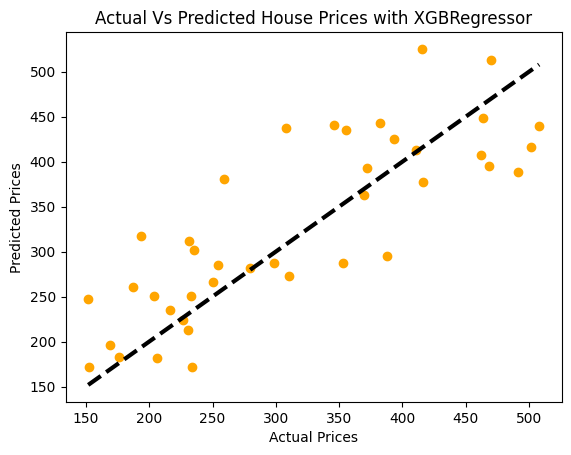

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Plot the predictions
plt.scatter(y_test, predictions, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Vs Predicted House Prices with XGBRegressor')
plt.savefig(f"{output_folder}/Actual Vs Predicted House Prices with XGBRegressor.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Plot the first feature vs price (Num Rooms)
plt.scatter(data['num_rooms'], data['price'], label='Num Rooms vs Price', color='forestgreen')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.legend()
plt.title('Number of Rooms vs Price')
plt.savefig(f"{output_folder}/Num_Rooms_vs_Price_XGB.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

# Plot the second feature vs price (House Age)
plt.scatter(data['house_age'], data['price'], label='House Age vs Price', color='darkred')
plt.xlabel('House Age')
plt.ylabel('Price')
plt.legend()
plt.title('House Age vs Price')
plt.savefig(f"{output_folder}/House_Age_vs_Price_XGB.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()